# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (13 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [452]:
import pandas as pd
import pylab as pl
import folium
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [24]:
#data_df = pd.read_csv("geopos_vk.csv", sep=",", header=0, encoding='windows-1251')
data_df = pd.read_csv('geopos_vk.csv')
data_df.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,36,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.485073e+09


In [477]:
#X = data_df[['latitude', 'longitude']].values
#print X
X_data = data_df[['latitude', 'longitude']]
X_data.head()

,latitude,longitude
0,55.657941,37.751574
1,53.202017,50.141377
2,59.843376,30.231480
3,55.174954,61.451611
4,54.860834,83.091932


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [19]:
N = 37 # put your index here

In [20]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [462]:
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial import distance

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, k, linkage='single', **kwargs):
        
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.cluster_numbers = k
        self.linkage = linkage
        
        return
    
    def single_linkage (self, i, j):
        
        dist = 9000000000000/0.1
        
        for i_ in self.label_dict[i]:
            for j_ in self.label_dict[j]:
                if (distance.euclidean(self.data[i_], self.data[j_]) < dist):
                    dist = distance.euclidean(self.data[i_], self.data[j_])
                    
        return dist
    

    def average_linkage (self, i, j):
        
        dist = 0
        
        for i_ in self.label_dict[i]:
            for j_ in self.label_dict[j]:
                    dist += distance.euclidean(self.data[i_], self.data[j_])
                    
        return dist / (len(self.label_dict[i]) * len(self.label_dict[j]))
    
    
    def complete_linkage (self, i, j):
        
        dist = -0.01
        
        for i_ in self.label_dict[i]:
            for j_ in self.label_dict[j]:
                if distance.euclidean(self.data[i_], self.data[j_]) > dist:
                    dist = distance.euclidean(self.data[i], self.data[j])
                    
        return dist

    
    def distance_single(self, i, a):
        _dist = 9000000000000/0.1
        for i_ in self.label_dict[i]:
            cur = distance.euclidean(self.data[i_], a)
            #print "self.data[i_]", self.data[i_]
            #print "a", a
            if cur < _dist:
                _dist = cur
        return _dist
    
    def distance_complete(self, i, a): # ищем максимум расстояния до точки по всем точкам из кластера
        _dist = 0
        distance_n = 9000000000000/0.1 + 1
        for i_ in self.label_dict[i]:
            if len(self.label_dict[i])>0:
                cur = distance.euclidean(self.data[i_], a)
            #print "self.data[i_]", self.data[i_]
            #print "a", a
                if cur > _dist:
                    _dist = cur
                    distance_n = _dist
        #print _dist
        return distance_n
    
    def distance_average(self, i, a):
        _dist = 0
        distance_n = 9000000000000/0.1 + 1
        for i_ in self.label_dict[i]:
            if len(self.label_dict[i])>0:
            #cur = distance.euclidean(self.data[i_], a)
                _dist += distance.euclidean(self.data[i_], a)
                _dist /=len(self.label_dict[i])
                distance_n = _dist
            #print "self.data[i_]", self.data[i_]
            #print "a", a
            #if cur < _dist:
                #_dist = cur
        #print _dist
            #else:
                #distance_n = 9000000000000/0.1 + 1
        return distance_n
    
        
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        if self.linkage == 'single':
            distance_clusters = self.single_linkage
            
        if self.linkage == 'average':
            distance_clusters = self.average_linkage
            
        if self.linkage == 'complete':
            distance_clusters = self.complete_linkage
        
        #self.x_len = len(X)
        self.data = X
        c = self.data.shape[0]
        self.label_dict = {i:[i] for i in range(c)}
        #print self.label_dict.items()
        #num = 0
        
        while (c > self.cluster_numbers):
            
            dist = 1000000000000.0
            ind_1 = 0
            ind_2 = 0
            
            for i in range(self.data.shape[0]):
                for j in range(i+1, self.data.shape[0]):
                    if (len(self.label_dict[i]) * len(self.label_dict[j]) > 0):
                        current_dist = distance_clusters(i,j)
                        #print i
                        #print j
                        #print " current_dist",current_dist
                        
                        if current_dist < dist:
                            #print current_dist
                            #print dist
                            dist = current_dist
                            ind_1 = i
                            ind_2 = j 
                            #print "info"
                            #print ind_1
                            #print ind_2
                #print i, "end"
                #print ind_1, ind_2
            #print "rezindex", ind_1, ind_2
            self.label_dict[ind_1] = self.label_dict[ind_1] + self.label_dict[ind_2]
            self.label_dict[ind_2] = [] 
            c -= 1
            #pl.scatter(self.data[:, 0], self.data[:, 1], c=self.predict(self.data), lw=0, s=30)
            #pl.show()
        #print self.label_dict.items()
        return self
    
    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        """
        return self.label_dict.values()
        """
        
        clusters_labels = np.zeros(X.shape[0])
        #print clusters_labels
        
        for i in range(X.shape[0]):
            
            dist = 9000000000000/0.1
            ind_j = 0
            #print "i", i
            #print self.label_dict
            for j in self.label_dict:
                #print "j", j
                if self.linkage == 'single':
                    if self.distance_single(j, X[i]) < dist:
                        dist = self.distance_single(j, X[i])
                        ind_j = j
                elif self.linkage == 'complete':
                    if self.distance_complete(j, X[i]) < dist:
                        #print "j", j
                        #print self.distance_complete(j, X[i])
                        dist = self.distance_complete(j, X[i])
                        ind_j = j
                elif self.linkage == 'average':
                    if self.distance_average(j, X[i]) < dist:
                        #print "j", j
                        #print self.distance_average(j, X[i])
                        dist = self.distance_average(j, X[i])
                        ind_j = j
                    #dist = self.distance(j, X[i])
                    #ind_j = j
            
            clusters_labels[i] = ind_j
        #print clusters_labels

        return clusters_labels
        #return [random.randint(0,5) for r in xrange(self.x_len)]
    
    def fit_predict(self, x, y=None):

        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

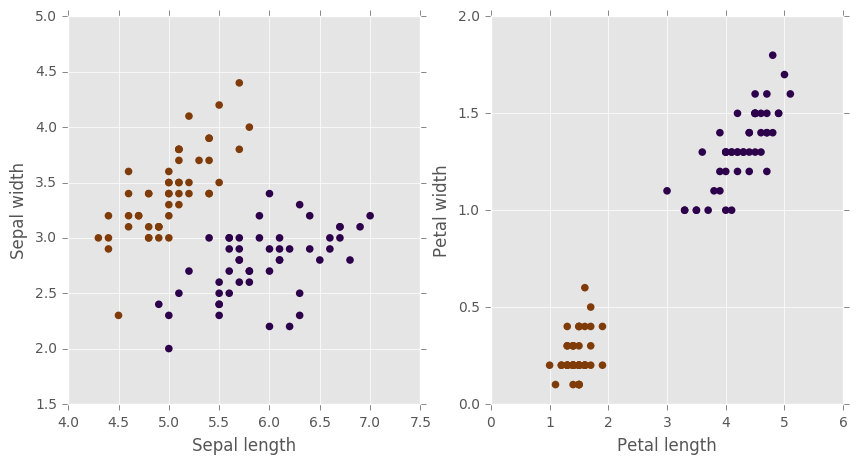

In [247]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

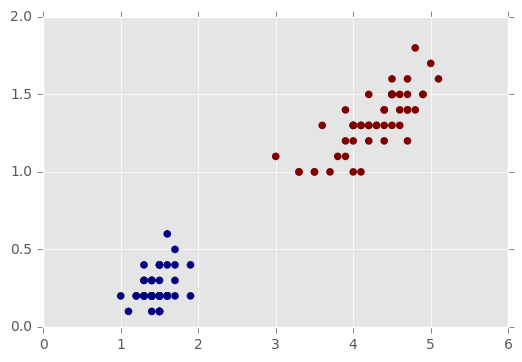

<bound method Clustering.fit_predict of Clustering(k=None, linkage='single')>

In [463]:
cl = Clustering(k = 2, linkage='single')
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=cl.fit_predict(x_iris[:, :]), lw=0, s=30)
pl.show()
cl.fit_predict

In [464]:
pred_iris = Clustering(k = 2, linkage='single').fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [484]:
def quality(X, num): # silhouette
    model = Clustering(k = num, linkage='single')
    res = model.fit_predict(X[:, :])
    #labels = res.predict.clusters_labels
    main_dist = []
    k = 0
    sil = 0
    BIG_NUM = 100000000000.0
    klusters = list()
    for j in range(len(res)):
        if res[j] not in klusters:
            klusters.append(res[j])
    klusters.sort()
    #print klusters
    for i in range(X.shape[0]):
        #print "i", i
        a = 0
        dist = []
        lable_dict = {}
        for item in klusters:
            lable_dict[int(item)]=[]
            
        for j in range(X.shape[0]):
            
            if (res[j]==res[i]):
                a += distance.euclidean(X[i], X[j])
                lable_dict[int(res[i])].append(BIG_NUM)
            else:
                lable_dict[int(res[j])].append(distance.euclidean(X[i], X[j]))
                #lable_dict[int(res[j])].update(distance.euclidean(X[i], X[j]))
                #print (distance.euclidean(X[i], X[j]))
                lable_dict[int(res[i])].append(BIG_NUM)
                
        if (list(res).count(res[i])) > 1:
            a /= (list(res).count(res[i]) - 1)
        else:
            a /= 1
        #print "a", a
        #dist.append(a)
        #print lable_dict
        for item in lable_dict:
                lable_dict[item] = np.mean(lable_dict[item])
                
        #b_list = []
        #for item in lable_dict:
        #   if lable_dict[item]:
        #        b_list.append(lable_dict[item])        
        b = min(lable_dict.values())
        #b = min(b_list)
        #print "b", b
        
        sil += (b - a) / max(b, a)
        
        #print "sil", sil
    
        #main_dist.extend(dist)
    #print main_dist
    sil /= X.shape[0]

    return sil

In [466]:
for i in range(2, 4):
    print i, quality(x_iris, i)

2 0.736936816068
3 0.567559252189


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

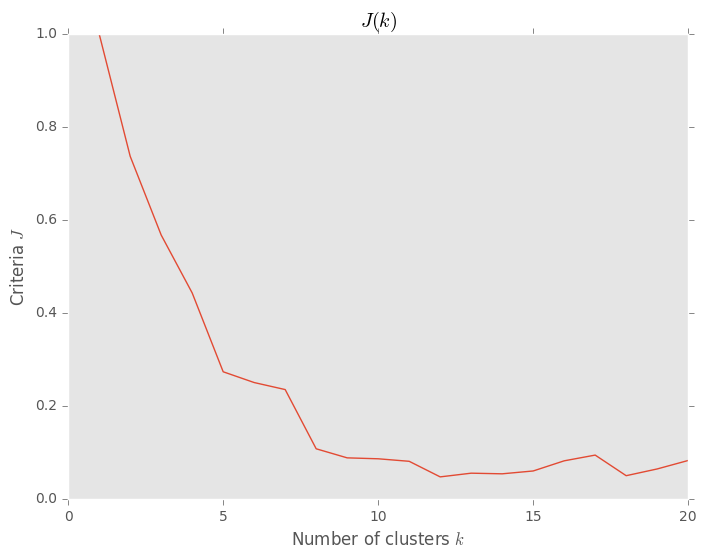

In [470]:
# В результате анализа получили оптимальные параметры k - минимальное из предложенных
ks = range(1, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(k, linkage='single')
    y = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, k)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

In [485]:
# Функция для определения оптимального количества кластеров

def optimal_num(X):
    
    clusters_num = [2, 3, 4, 5, 6]
    criteria = np.zeros(len(clusters_num))
    
    for i in clusters_num:
        list(criteria).append(quality(X, i))
        
    l = -90000000000/0.1
    cluster = 0
    
    for i in range(len(criteria)):
        
        if criteria[i] > l:
            
            l = criteria[i]
            cluster = clusters_num[i]
            
    return cluster

In [475]:
#Посчитаем оптимальное кол-во кластеров для датасета iris
optimal_num(x_iris)

2

In [478]:
# Возьмем центр Москвы
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
data_moscow = pd.DataFrame(X_data[X_data.latitude.between(mos_min_lat, mos_max_lat) &
                   X_data.longitude.between(mos_min_lon, mos_max_lon)])

In [479]:
data_moscow.shape

(1671, 2)

In [490]:
#Выберем данные для кластеризации

data_sample = []

for i in range(0, 1670, 6):
    
    points = []
    points.append(data_moscow.values[i][0])
    points.append(data_moscow.values[i][1])
    data_sample.append(points)
    
data_sample = np.array(data_sample)

data_sample.shape

(279, 2)

In [491]:
#Посчитаем оптимальное кол-во кластеров для выбранных данных
optimal_num(data_sample)

2

In [505]:
#Запустим кластеризацию с полученным числом кластеров
cl = Clustering(k = 2, linkage='complete')
labels = cl.fit_predict(data_sample)

In [494]:
moscow_data = pd.DataFrame(data_sample)
moscow_data = moscow_data.rename( columns={0: 'latitude', 1: "longitude"})
moscow_data.head()

,latitude,longitude
0,55.657941,37.751574
1,55.824390,37.622387
2,55.828703,37.633688
3,55.708917,37.625451
4,55.785792,37.595609


In [495]:
import folium
from folium.plugins import MarkerCluster

In [510]:
labels = np.array(labels)
#labels

In [507]:
colors = np.empty(labels.shape[0], dtype = 'S10')
colors[labels == 0] = 'green'
colors[labels == 75] = 'red'
#colors

In [508]:
# Карта отображается не совсем так как должна
moscow = folium.Map(location=mos_center, zoom_start=11, control_scale=True)
marker_cluster = MarkerCluster(locations=moscow_data[['latitude', 'longitude']].values, icons = colors)
marker_cluster.add_to(moscow)
moscow

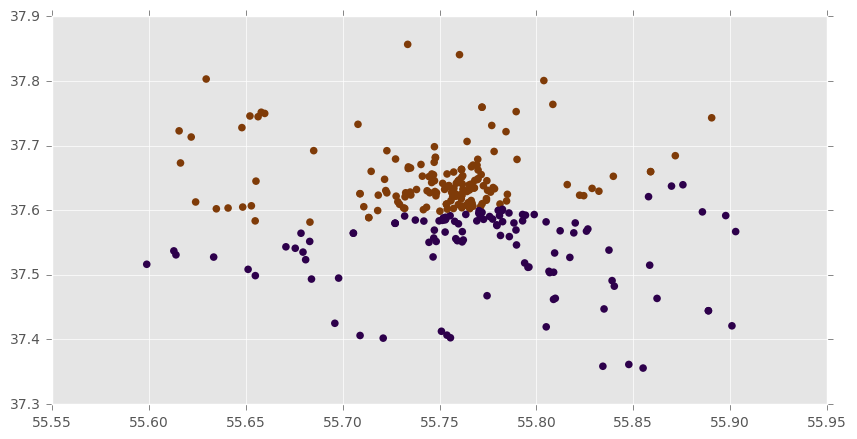

In [509]:
# Изобразим полученные данные на графике
pl.figure(figsize=(10, 5))
pl.scatter(moscow_data['latitude'], moscow_data['longitude'], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

Вывод: на графике видно, что получилось 2 кластера, один южная часть Москвы, второй - северная. 
Качество кластеризации довольно хорошее.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.